In [1]:
%load_ext autoreload
%autoreload 2

from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import sys
import os

sys.path.append(os.path.join(os.path.abspath('.'),'../..'))

In [2]:
import plankton.plankton as pl
import matplotlib.pyplot as plt
import numpy as np

##### Load coordinate data:

In [3]:
from urllib import request

# Define base URL path to the data
base_path = "https://export.uppmax.uu.se/snic2022-23-113/courses/spatial_omics_2022/in_situ_sequencing/"    

# Create directory for the dataset
os.makedirs( "./data/in_situ_sequencing" , exist_ok= True )

# Download necessary tar.gz files
for tar_file in ["raw_tiles_with_z.tar.gz","SpaceTX.tar.gz"]:
    print ("Downloading " + base_path + tar_file)
    request.urlretrieve( base_path+tar_file , "./data/in_situ_sequencing/"+tar_file )



KeyboardInterrupt: 

##### Load background image:

In [4]:
from PIL import Image
Image.MAX_IMAGE_PIXELS = 933120000

image_file='background.png'
image_resolution=umpp #um/px
image_downsampling=0.1 #downsample image to 10% resolution for faster plotting

bg = Image.open(os.path.join(data_folder,image_file),) 
bg = bg.resize((int(bg.width*image_downsampling),int(bg.height*image_downsampling)),Image.ANTIALIAS)
bg = np.array(bg.getdata()).reshape((bg.height,bg.width,-1)).sum(-1)

bgmap = pl.PixelMap(bg,upscale=1/image_downsampling/image_resolution)


NameError: name 'umpp' is not defined

In [ ]:
sdata = pl.SpatialData(x_coordinates=coordinates[coordinate_columns[0]],
                       y_coordinates=coordinates[coordinate_columns[1]],
                       genes=coordinates[coordinate_columns[2]],
                        pixel_maps=[bgmap]) 

In [ ]:
plt.figure(figsize=(17,17))
sdata.scatter(alpha=0.1,marker='.')

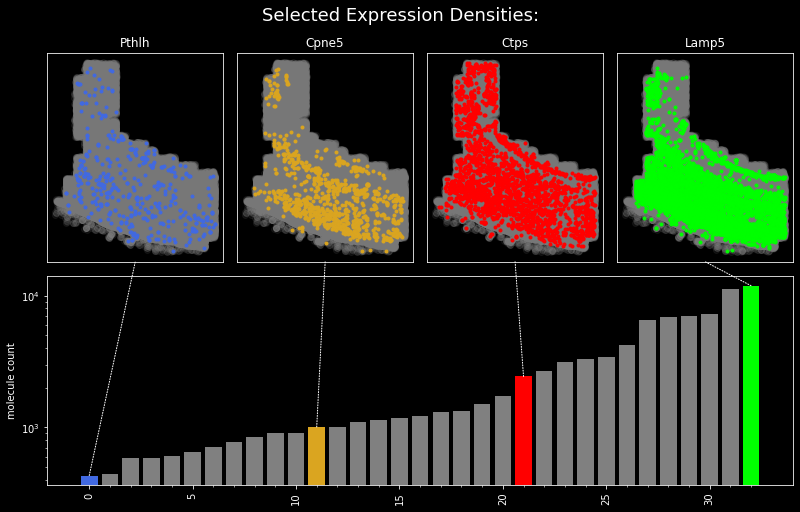

In [7]:
sdata.plot_overview()

In [16]:
knn_neighbors=250
bandwidth=20
n_neighbors=50
metric='euclidean'
min_dist=0.0
random_state=42
zero_weight=0

_=sdata.graph.update_knn(n_neighbors=knn_neighbors)

sdata.graph.run_umap(bandwidth=bandwidth,n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, random_state=random_state,zero_weight=zero_weight)

